
RECIPE BOOK! 

First we will read the data using pandas! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recipes = pd.read_csv('epi_r.csv', sep=",", index_col=0)
recipes

# print(' '.join(map(str, recipes.head(1).values.tolist())))
# recipes.head(1).columns[recipes.head(1).isin([1.0]).any()]

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
title,,,,,,,,,,,,,,,,,,,,,
"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We see a around 20052 samples but quite a lot of features. We need to bring down the number of features to classify results better. But first let's check the summary. 

In [3]:
def getDfSummary(input_data):
    # Place your code here
    output_data = input_data.describe().transpose()
    output_data["number_distinct"] = input_data.nunique()
    output_data["number_nan"] = input_data.isna().sum()
    return output_data

In [4]:
recipes_stat = getDfSummary(recipes)
recipes_nan_stats = recipes_stat.loc[recipes_stat['number_nan'] != 0]
recipes_full_stats = recipes_stat.loc[recipes_stat['number_nan'] == 0]

print(recipes_nan_stats['number_nan'])
recipes_full_stats

calories    4117
protein     4162
fat         4183
sodium      4119
Name: number_nan, dtype: int64


,count,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
rating,20052.0,3.714467,1.340829,0.0,3.75,4.375,4.375,5.0,8,0
#cakeweek,20052.0,0.000299,0.017296,0.0,0.00,0.000,0.000,1.0,2,0
#wasteless,20052.0,0.000050,0.007062,0.0,0.00,0.000,0.000,1.0,2,0
22-minute meals,20052.0,0.000848,0.029105,0.0,0.00,0.000,0.000,1.0,2,0
3-ingredient recipes,20052.0,0.001346,0.036671,0.0,0.00,0.000,0.000,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...
cookbooks,20052.0,0.000150,0.012231,0.0,0.00,0.000,0.000,1.0,2,0
leftovers,20052.0,0.000349,0.018681,0.0,0.00,0.000,0.000,1.0,2,0
snack,20052.0,0.001396,0.037343,0.0,0.00,0.000,0.000,1.0,2,0
snack week,20052.0,0.000948,0.030768,0.0,0.00,0.000,0.000,1.0,2,0


We see that some entries above have nan values. It may not be useful for analysis. Hence we remove them. 

In [5]:
recipes_nan_records = recipes[recipes.isna().any(axis=1)]
recipes_full_records = recipes[~recipes.isna().any(axis=1)]

recipes_stat = getDfSummary(recipes_full_records)
recipes_stat

,count,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
rating,15864.0,3.760952,1.285518,0.0,3.75,4.375,4.375,5.0,8,0
calories,15864.0,6350.682993,359848.417868,0.0,199.00,333.000,587.250,30111218.0,1858,0
protein,15864.0,100.324571,3843.462312,0.0,3.00,8.000,27.000,236489.0,282,0
fat,15864.0,346.986826,20459.329549,0.0,7.00,17.000,33.000,1722763.0,326,0
sodium,15864.0,6252.742310,334042.078448,0.0,82.00,296.000,713.000,27675110.0,2433,0
...,...,...,...,...,...,...,...,...,...,...
cookbooks,15864.0,0.000126,0.011228,0.0,0.00,0.000,0.000,1.0,2,0
leftovers,15864.0,0.000315,0.017751,0.0,0.00,0.000,0.000,1.0,2,0
snack,15864.0,0.001324,0.036360,0.0,0.00,0.000,0.000,1.0,2,0
snack week,15864.0,0.000819,0.028615,0.0,0.00,0.000,0.000,1.0,2,0


We then attempt to take only the binary valued entries for target since it will be hard to predict ratings or calories with just binary entries. 

In [6]:
categories = []
recipes_bin_cols = recipes.isin([0,1]).all()
for col in recipes.columns:
    if recipes_bin_cols[col] == True:
        categories.append(col)

categories

['#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broccoli',
 'broccoli rabe',
 'broil',
 'brooklyn',
 'brow

We consider only few targets which has tolerable inbalance in class data. 

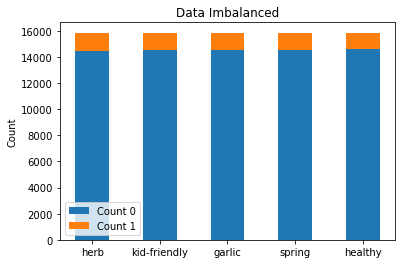

In [7]:
diffdict = {}
for i, category in enumerate(categories):
    freqarr = recipes_full_records.loc[:, recipes.columns== category].to_numpy()
    freqarr0 = freqarr[freqarr == 0]
    freqarr1 = freqarr[freqarr == 1]
    count0 = len(freqarr0)
    count1 = len(freqarr1)
    diff = count0 - count1
    if diff < 0:
        diff = -1* diff
    diffdict[category] = diff, count0, count1
diffdict = dict(sorted(diffdict.items(), key=lambda item: item[1]))
# print(diffdict)
imbalanced_dict = {k:v for (k,v) in diffdict.items() if v[0] >= 13000}
targets = list(imbalanced_dict.keys())
# print(targets)

values = np.array([list(x) for x in imbalanced_dict.values()])
N = 5
# print(values[:N, :])

width = 0.5
ind = np.arange(N)
p1 = plt.bar(ind, values[:N, 1], width)
p2 = plt.bar(ind, values[:N, 2], width,
             bottom=values[:N, 1])

plt.ylabel('Count')
plt.title('Data Imbalanced')
plt.xticks(ind, targets[:N])
plt.legend((p1[0], p2[0]), ('Count 0', 'Count 1'))

plt.show()

    

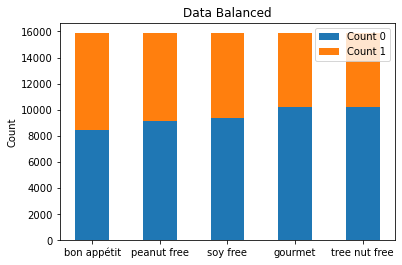

In [8]:
balanced_dict = {k:v for (k,v) in diffdict.items() if v[0] <= 13000}
targets = list(balanced_dict.keys())
# print(targets)

values = np.array([list(x) for x in balanced_dict.values()])
N = 5
# print(values[:N, :])

width = 0.5
ind = np.arange(N)
p1 = plt.bar(ind, values[:N, 1], width)
p2 = plt.bar(ind, values[:N, 2], width,
             bottom=values[:N, 1])

plt.ylabel('Count')
plt.title('Data Balanced')
plt.xticks(ind, targets[:N])
plt.legend((p1[0], p2[0]), ('Count 0', 'Count 1'))

plt.show()

We choose the ones which has correlation to our targets above using decision tree classifier. 

In [9]:
# categories.extend(recipes.columns[:5])
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



def getTestTrainData(X, y):
    xtr, xts, ytr, yts = train_test_split(X, y, test_size=0.33)
    xtr, xts, ytr, yts = xtr.to_numpy(), xts.to_numpy(), ytr.to_numpy().ravel(), yts.to_numpy().ravel()
    return xtr, xts, ytr, yts
    
def getPredictors(target):
    dt_classifier = DecisionTreeClassifier(criterion="entropy")   
    categories.remove(target)
    X = recipes_full_records.loc[:, categories]
    y = recipes_full_records.loc[:, recipes.columns== target]
    xtr, xts, ytr, yts = getTestTrainData(X, y)
    dt_classifier.fit(xtr, ytr)
    predictors = []
    for i, column in enumerate(categories):
        if(dt_classifier.feature_importances_[i] > 0):
            predictors.append(column)
    categories.append(target)
    return predictors

Since we have multiple targets to predict, we will use a pipeline to apply logistic regression and one vs rest classifier. 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier# Using pipeline for applying logistic regression and one vs rest classifier
from sklearn.metrics import precision_recall_fscore_support

def getMetrics(yts, yhat):
    accuracy = accuracy_score(yts, yhat)
    precision,recall,f1_score,_  = precision_recall_fscore_support(yts,yhat,average='binary') 
    return accuracy, precision, recall, f1_score

    
    
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear'), n_jobs=-1)),
            ])


for target in targets:
    
    # Training logistic regression model on train data
    predictors = getPredictors(target)
    X = recipes_full_records.loc[:, predictors]
    y = recipes_full_records.loc[:, recipes.columns== target]

    xtr, xts, ytr, yts = getTestTrainData(X, y)
    LogReg_pipeline.fit(xtr, ytr)
    
    # calculating test accuracy
    yhat = LogReg_pipeline.predict(xts)
    accuracy, precision, recall, f1_score = getMetrics(yts, yhat)
    print("Category {}".format(target))
    print("predictors "+ str(predictors))
    unique, counts = np.unique(ytr, return_counts=True)
    print(dict(zip(unique, counts)))
    unique, counts = np.unique(yts, return_counts=True)
    print(dict(zip(unique, counts)))
    print('Test accuracy of {} is {}'.format(target, accuracy))
    print('Test precision of {} is {}'.format(target, precision))
    print('Test recall of {} is {}'.format(target, recall))
    print('Test f1-score of {} is {}'.format(target, f1_score))
    
    
    print("\n")

Category bon appétit
predictors ['#cakeweek', '22-minute meals', 'advance prep required', 'alcoholic', 'almond', 'anise', 'anniversary', 'aperitif', 'appetizer', 'apple', 'apricot', 'artichoke', 'arugula', 'asparagus', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'bake', 'banana', 'basil', 'bass', 'bean', 'beef', 'beet', 'bell pepper', 'berry', 'birthday', 'blender', 'blue cheese', 'blueberry', 'boil', 'bon app��tit', 'bourbon', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brine', 'brisket', 'broccoli', 'broil', 'brunch', 'brussel sprout', 'buffet', 'bulgur', 'butter', 'buttermilk', 'butternut squash', 'cabbage', 'cake', 'campari', 'candy', 'capers', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 'celery', 'champagne', 'chartreuse', 'cheddar', 'cheese', 'cherry', 'chicken', 'chile pepper', 'chill', 'chive', 'chocolate', 'christmas', 'christmas eve', 'cilantro', 'cinco de mayo', 'cinnamon', 'citrus', 'clove', 'cocktail', 'cocktail party', 'coconut', 'coffee', 'coffee

Category tree nut free
predictors ['almond', 'amaretto', 'anise', 'anniversary', 'appetizer', 'apricot', 'artichoke', 'asparagus', 'bacon', 'bake', 'basil', 'bean', 'berry', 'birthday', 'blender', 'blue cheese', 'bok choy', 'breakfast', 'broccoli', 'brunch', 'brussel sprout', 'cake', 'calvados', 'cantaloupe', 'carrot', 'cashew', 'cheddar', 'cheese', 'chestnut', 'chicken', 'chill', 'chocolate', 'christmas', 'christmas eve', 'cinco de mayo', 'cinnamon', 'citrus', 'cobbler/crumble', 'cocktail party', 'coconut', 'coffee', 'condiment/spread', 'connecticut', 'cookies', 'couscous', 'cream cheese', 'cumin', 'currant', 'curry', 'dairy', 'dairy free', 'date', 'dessert', 'dinner', 'dried fruit', 'drink', 'easter', 'edible gift', 'egg', 'eggplant', 'escarole', 'fall', 'family reunion', "father's day", 'fig', 'food processor', 'fourth of july', 'frangelico', 'freeze/chill', 'frozen dessert', 'fruit', 'fry', 'goat cheese', 'graduation', 'grape', 'grapefruit', 'green bean', 'grill/barbecue', 'ground 

Category quick & easy
predictors ['22-minute meals', '3-ingredient recipes', '30 days of groceries', 'advance prep required', 'almond', 'amaretto', 'anchovy', 'anise', 'appetizer', 'apple', 'apricot', 'arizona', 'artichoke', 'arugula', 'asparagus', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil', 'bass', 'bean', 'beef', 'beef rib', 'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 'bok choy', 'bourbon', 'braise', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brooklyn', 'brunch', 'brussel sprout', 'buffet', 'bulgur', 'butter', 'buttermilk', 'butternut squash', 'cabbage', 'cake', 'california', 'cambridge', 'canada', 'candy', 'candy thermometer', 'cantaloupe', 'capers', 'caraway', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 'celery', 'chard', 'cheddar', 'cheese', 'cherry', 'chestnut', 'chicken', 'chickpea', 'chile pep

Category bake
predictors ['3-ingredient recipes', 'advance prep required', 'alabama', 'almond', 'amaretto', 'anise', 'anniversary', 'appetizer', 'apple', 'apricot', 'arizona', 'artichoke', 'arugula', 'asparagus', 'back to school', 'backyard bbq', 'bacon', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean', 'beef', 'beef rib', 'beet', 'bell pepper', 'berry', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 'bon app��tit', 'bourbon', 'braise', 'brandy', 'bread', 'breakfast', 'brisket', 'broil', 'brunch', 'buffet', 'butter', 'buttermilk', 'butternut squash', 'cabbage', 'cake', 'california', 'candy', 'candy thermometer', 'capers', 'caraway', 'cardamom', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 'celery', 'chartreuse', 'cheddar', 'cheese', 'cherry', 'chicken', 'chile pepper', 'chill', 'chocolate', 'christmas', 'christmas eve', 'cilantro', 'cinco de mayo', 'cinnamon', 'citrus', 'clam', 'clove', 'cocktail party', 'coconut', 'coffee', 'cognac/armagnac', 'condi

Category dessert
predictors ['advance prep required', 'almond', 'anise', 'appetizer', 'apple', 'apricot', 'avocado', 'backyard bbq', 'bacon', 'banana', 'bean', 'beef', 'beet', 'berry', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'bourbon', 'bread', 'breakfast', 'broil', 'brownie', 'brunch', 'butter', 'buttermilk', 'cake', 'candy', 'candy thermometer', 'cantaloupe', 'carrot', 'champagne', 'cheddar', 'cheese', 'cherry', 'chestnut', 'chicken', 'chill', 'chocolate', 'christmas', 'cinnamon', 'citrus', 'clove', 'cobbler/crumble', 'cocktail party', 'coconut', 'coffee', 'cognac/armagnac', 'condiment/spread', 'cookies', 'cornmeal', 'cranberry', 'cream cheese', 'currant', 'dairy', 'date', 'dinner', 'double boiler', 'dried fruit', 'drink', 'easter', 'edible gift', 'egg', 'engagement party', 'fall', 'fat free', 'fig', 'fish', 'food processor', 'freeze/chill', 'friendsgiving', 'frozen dessert', 'fruit', 'fruit juice', 'fry', 'garlic', 'ginger', 'grill/barbecue', 'halloween', 'ham', 'harper

Category fall
predictors ['alcoholic', 'almond', 'anise', 'anniversary', 'appetizer', 'apple', 'apricot', 'artichoke', 'arugula', 'asian pear', 'asparagus', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'barley', 'basil', 'bass', 'bastille day', 'bean', 'beef', 'beef shank', 'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry', 'birthday', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 'bourbon', 'braise', 'bread', 'breadcrumbs', 'breakfast', 'brine', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brunch', 'bulgaria', 'bulgur', 'buttermilk', 'butternut squash', 'cabbage', 'cake', 'canada', 'candy', 'candy thermometer', 'capers', 'carrot', 'casserole/gratin', 'cauliflower', 'celery', 'champagne', 'chard', 'cheese', 'cherry', 'chestnut', 'chicken', 'chile pepper', 'chill', 'chocolate', 'christmas', 'christmas eve', 'cilantro', 'cinnamon', 'citrus', 'clam', 'clove', 'cocktail party', 'coconut', 'coffee', 'cognac/armagnac', 'condiment', 'condiment/spread', 'co

Category kidney friendly
predictors ['#cakeweek', 'advance prep required', 'almond', 'amaretto', 'anise', 'appetizer', 'apple', 'apricot', 'artichoke', 'back to school', 'bacon', 'banana', 'barley', 'berry', 'birthday', 'biscuit', 'blackberry', 'blender', 'blueberry', 'boil', 'bourbon', 'brandy', 'bread', 'breakfast', 'broil', 'brunch', 'butter', 'cabbage', 'cake', 'california', 'cambridge', 'carrot', 'cheddar', 'cheese', 'cherry', 'chill', 'chive', 'chocolate', 'christmas', 'cinco de mayo', 'citrus', 'cocktail party', 'coconut', 'cod', 'coffee', 'condiment', 'condiment/spread', 'cookie', 'cookies', 'coriander', 'corn', 'cornmeal', 'cottage cheese', 'couscous', 'crab', 'cranberry', 'cream cheese', 'dairy', 'date', 'dinner', 'double boiler', 'dried fruit', 'drink', 'duck', 'easter', 'eau de vie', 'edible gift', 'egg', 'engagement party', 'family reunion', 'fat free', 'feta', 'fig', 'fish', 'food processor', 'fourth of july', 'freeze/chill', 'frozen dessert', 'fruit', 'fruit juice', 'fry

Category onion
predictors ['3-ingredient recipes', 'almond', 'appetizer', 'apple', 'apricot', 'arizona', 'artichoke', 'arugula', 'asparagus', 'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'basil', 'bean', 'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry', 'bitters', 'blender', 'blue cheese', 'boil', 'bok choy', 'braise', 'brandy', 'bread', 'breakfast', 'broccoli rabe', 'broil', 'brooklyn', 'brown rice', 'brunch', 'bulgur', 'butter', 'cabbage', 'cake', 'cantaloupe', 'caraway', 'carrot', 'cashew', 'casserole/gratin', 'celery', 'chard', 'cheddar', 'cheese', 'cherry', 'chicken', 'chickpea', 'chile pepper', 'chill', 'chive', 'christmas', 'christmas eve', 'cilantro', 'cinco de mayo', 'cinnamon', 'citrus', 'clam', 'clove', 'cocktail party', 'coconut', 'cod', 'cognac/armagnac', 'condiment', 'condiment/spread', 'corn', 'cornmeal', 'cranberry', 'cumin', 'curry', 'dairy', 'dill', 'diwali', 'dried fruit', 'drink', 'duck', 'easter', 'eg

Category tomato
predictors ['3-ingredient recipes', 'alcoholic', 'almond', 'anniversary', 'appetizer', 'apple', 'arizona', 'artichoke', 'arugula', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'barley', 'basil', 'bass', 'bean', 'beef', 'beef rib', 'beef shank', 'beer', 'beet', 'bell pepper', 'berry', 'blender', 'blue cheese', 'boil', 'bon app��tit', 'braise', 'bread', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brunch', 'buffet', 'butter', 'buttermilk', 'butternut squash', 'cabbage', 'california', 'capers', 'carrot', 'casserole/gratin', 'cauliflower', 'celery', 'chard', 'cheddar', 'cheese', 'cherry', 'chicken', 'chile pepper', 'chill', 'chive', 'chocolate', 'christmas', 'cilantro', 'cinco de mayo', 'citrus', 'clam', 'cocktail', 'cocktail party', 'coconut', 'cod', 'collard greens', 'colorado', 'condiment', 'condiment/spread', 'cookie', 'cookies', 'corn', 'cornmeal', 'couscous', 'crab', 'cream cheese', 'cucumber', 'currant', 'curry', 'dairy', 'dill', 'dip', 'diwali', 'drink

Category vegan
predictors ['advance prep required', 'almond', 'anchovy', 'anise', 'anniversary', 'appetizer', 'apple', 'apricot', 'arugula', 'avocado', 'banana', 'basil', 'bean', 'beet', 'bell pepper', 'berry', 'blackberry', 'blender', 'blueberry', 'boil', 'bread', 'broil', 'brussel sprout', 'butter', 'butternut squash', 'cake', 'candy', 'candy thermometer', 'capers', 'carrot', 'celery', 'cheese', 'chicken', 'chill', 'chive', 'chocolate', 'cilantro', 'cinco de mayo', 'citrus', 'cocktail party', 'coconut', 'colorado', 'condiment/spread', 'cookies', 'corn', 'cranberry', 'cucumber', 'cumin', 'dairy', 'date', 'egg', 'eggplant', 'feta', 'fig', 'fish', 'flaming hot summer', 'food processor', 'freeze/chill', 'frozen dessert', 'fruit juice', 'fry', 'garlic', 'ginger', 'goat cheese', 'graduation', 'grape', 'green onion/scallion', 'grill', 'hanukkah', 'hazelnut', 'healthy', 'herb', 'high fiber', 'honey', 'kid-friendly', 'kosher for passover', 'leafy green', 'leek', 'legume', 'lemon', 'lemongrass

We see that while some (dessert, kosher) have good results, some have poor results. Let's take the use case of vegan which has fairly decent metrics. This time we will refine the number of features to be considered by choosing a lasso regulariser and considering a number of options for C. Since it takes time to run analysis, we run it with 10 values of C for now! 

In [11]:
target = 'vegan'



categories.remove(target)
X = recipes_full_records.loc[:, categories]
categories.append(target)
y = recipes_full_records.loc[:, recipes.columns== target]
xtr, xts, ytr, yts = getTestTrainData(X, y)

In [12]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold


# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset

model = LogisticRegression()

solvers = ['liblinear']
penalty = ['l1']
c_values = np.logspace(0.0001, 100, num= 20)
scoring = ['accuracy','precision', 'recall', 'f1']
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0, refit='accuracy')
grid_result = grid_search.fit(xtr,ytr)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.968730 using {'C': 1.0002302850208247, 'penalty': 'l1', 'solver': 'liblinear'}


We use the best C we got from above to do our logistic regression now. We should see a fairly improved recall and f1 score for target 'vegan' now! 

In [13]:
import sklearn.metrics as metrics
from sklearn.metrics import auc
logreg = linear_model.LogisticRegression(penalty= 'l1', C=grid_result.best_params_['C'],solver='liblinear')
logreg.fit(xtr,ytr)
yhat = logreg.predict(xts)
accuracy,precision,recall,f1_score = getMetrics(yts, yhat)
print('Logistic Regression metrics')
print('Test accuracy of {} is {}'.format(target, accuracy))
print('Test precision of {} is {}'.format(target, precision))
print('Test recall of {} is {}'.format(target, recall))
print('Test f1-score of {} is {}'.format(target, f1_score))

Logistic Regression metrics
Test accuracy of vegan is 0.9648586707410237
Test precision of vegan is 0.8416075650118203
Test recall of vegan is 0.7526427061310782
Test f1-score of vegan is 0.7946428571428572


<StemContainer object of 3 artists>

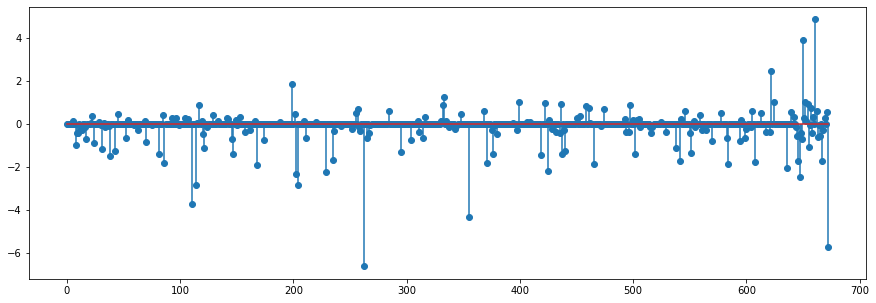

In [14]:
W = logreg.coef_
W = W.ravel()

predictors = []
wnonzero = []
for i, wval in enumerate(W):
    if(wval > 0):
        predictors.append(categories[i])
        wnonzero.append(wval)
#         print(categories[i] + " " + str(wval))
        
# print(set(predictors))
# print(set(wnonzero))
plt.figure(figsize = (15, 5))
plt.stem(W)

# print(len(categories))



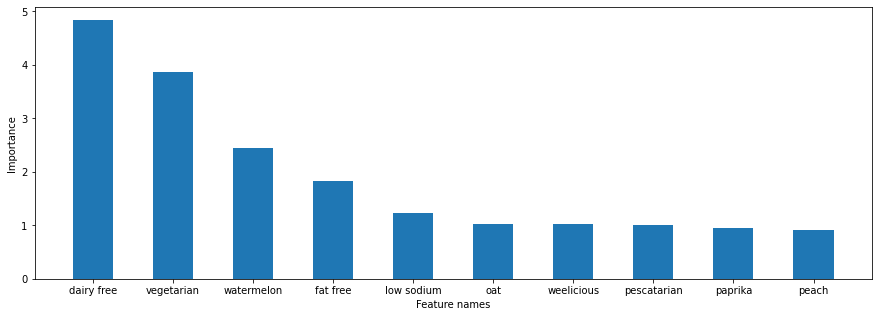

In [15]:
index = np.argsort(np.abs(wnonzero))

top_predictors = []
top_wval = []
for i in range(10):
    top_predictors.append(predictors[index[-i-1]])
    top_wval.append(wnonzero[index[-i-1]])

#Place your code here
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 5))
plt.bar(top_predictors, top_wval,width = 0.5)
plt.xlabel("Feature names")
plt.ylabel("Importance")
plt.show()

yproba_lr= logreg.predict_proba(xts)
fpr_lr, tpr_lr, _ = metrics.roc_curve(yts, yproba_lr[:, 1])

<AxesSubplot:>

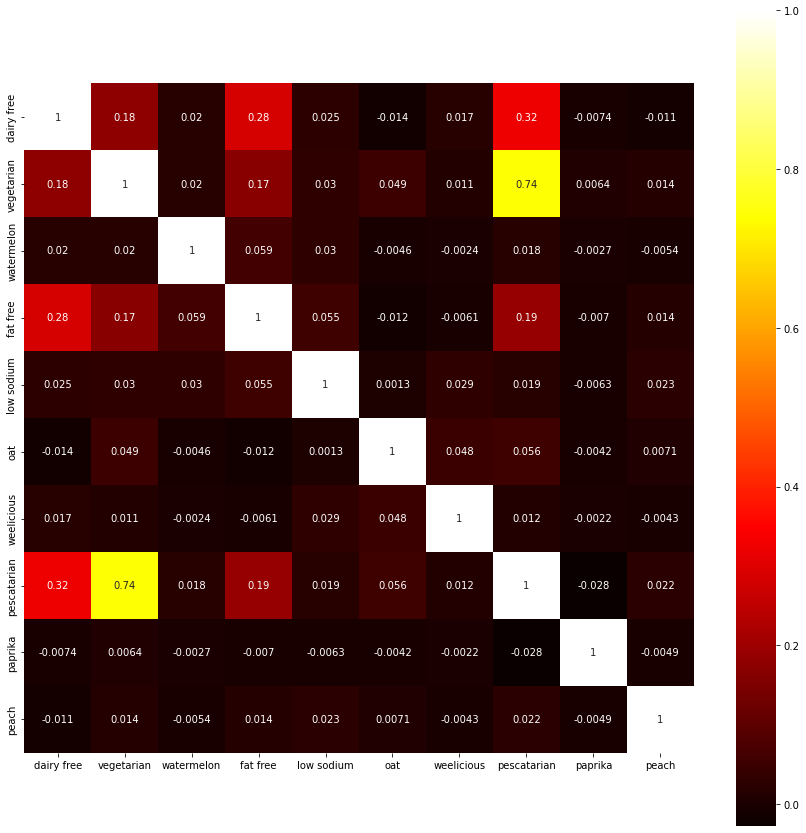

In [16]:
import seaborn as sns
corr = recipes_full_records.loc[:, top_predictors].corr(method ='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='hot')

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
target = 'vegan'
categories.remove(target)
X = recipes_full_records.loc[:, categories]
categories.append(target)
y = recipes_full_records.loc[:, recipes.columns== target]
xtr, xts, ytr, yts = getTestTrainData(X, y)
n_estimators =  [50, 200]
max_features = ['auto', 'sqrt', 'log2']
scoring = ['accuracy','precision', 'recall', 'f1']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0, refit='accuracy')
grid_result = grid_search.fit(xtr,ytr)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.970111 using {'max_features': 'auto', 'n_estimators': 200}


In [18]:
def getPredictors(target):
    rf_classifier = RandomForestClassifier(criterion="entropy", n_estimators= grid_result.best_params_['n_estimators'], max_features=grid_result.best_params_['max_features'])   
    categories.remove(target)
    X = recipes_full_records.loc[:, categories]
    y = recipes_full_records.loc[:, recipes.columns== target]
    xtr, xts, ytr, yts = getTestTrainData(X, y)
    rf_classifier.fit(xtr, ytr)
    predictors = []
    for i, column in enumerate(categories):
        if(rf_classifier.feature_importances_[i] > 0):
            predictors.append(column)
    categories.append(target)
    return predictors, rf_classifier

target = 'vegan'
predictors, rf_classifier = getPredictors(target)
X = recipes_full_records.loc[:, predictors]
y = recipes_full_records.loc[:, recipes.columns== target]

xtr, xts, ytr, yts = getTestTrainData(X, y)

rf_classifier.fit(xtr, ytr)
    
# calculating test accuracy
yhat = rf_classifier.predict(xts)

accuracy,precision,recall,f1_score = getMetrics(yts, yhat)
print('Random Forest metrics')
print('Test accuracy of {} is {}'.format(target, accuracy))
print('Test precision of {} is {}'.format(target, precision))
print('Test recall of {} is {}'.format(target, recall))
print('Test f1-score of {} is {}'.format(target, f1_score))

print(set(predictors))
yproba_rf= rf_classifier.predict_proba(xts)
fpr_rf, tpr_rf, _ = metrics.roc_curve(yts, yproba_rf[:, 1])


Random Forest metrics
Test accuracy of vegan is 0.9763177998472116
Test precision of vegan is 0.9138755980861244
Test recall of vegan is 0.8127659574468085
Test f1-score of vegan is 0.8603603603603603
{'#wasteless', 'garlic', 'bell pepper', 'pennsylvania', 'jícama', 'shavuot', 'sauce', 'shallot', 'peru', 'beet', 'tailgating', 'vermont', 'fish', 'bon app��tit', 'bulgur', 'potato', 'dip', 'poppy', 'sorbet', 'brussel sprout', 'entertaining', 'poultry', 'lettuce', 'watercress', 'asparagus', 'custard', 'kahlúa', 'lunch', 'strawberry', 'bass', 'low sugar', 'flaming hot summer', 'grill/barbecue', 'wedding', 'washington', 'tree nut', 'ham', 'stir-fry', 'denver', 'cookbooks', 'curry', 'digestif', 'lemon', 'lentil', '22-minute meals', 'kosher', 'buttermilk', '3-ingredient recipes', 'breakfast', 'low carb', 'weelicious', 'pescatarian', 'columbus', 'quince', 'bake', 'low cal', 'spice', 'super bowl', 'sherry', 'condiment', 'florida', 'stock', 'mardi gras', 'snack week', 'guam', 'chard', 'quick and 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1, 10))
grid = dict(n_neighbors=k_range)

model = KNeighborsClassifier()
target = 'vegan'
categories.remove(target)
X = recipes_full_records.loc[:, categories]
categories.append(target)
y = recipes_full_records.loc[:, recipes.columns== target]
xtr, xts, ytr, yts = getTestTrainData(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0, refit='accuracy')
grid_result = grid_search.fit(xtr, ytr)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.955934 using {'n_neighbors': 7}


In [20]:
knn = KNeighborsClassifier(n_neighbors = grid_result.best_params_['n_neighbors'])
knn.fit(xtr, ytr)
yhat = knn.predict(xts)
accuracy,precision,recall,f1_score = getMetrics(yts, yhat)
print('KNeighbors Classifier metrics')
print('Test accuracy of {} is {}'.format(target, accuracy))
print('Test precision of {} is {}'.format(target, precision))
print('Test recall of {} is {}'.format(target, recall))
print('Test f1-score of {} is {}'.format(target, f1_score))
yproba_knn= knn.predict_proba(xts)
fpr_knn, tpr_knn, _ = metrics.roc_curve(yts, yproba_knn[:, 1])
categories.append(target)


KNeighbors Classifier metrics
Test accuracy of vegan is 0.9518716577540107
Test precision of vegan is 0.8118556701030928
Test recall of vegan is 0.6376518218623481
Test f1-score of vegan is 0.7142857142857142


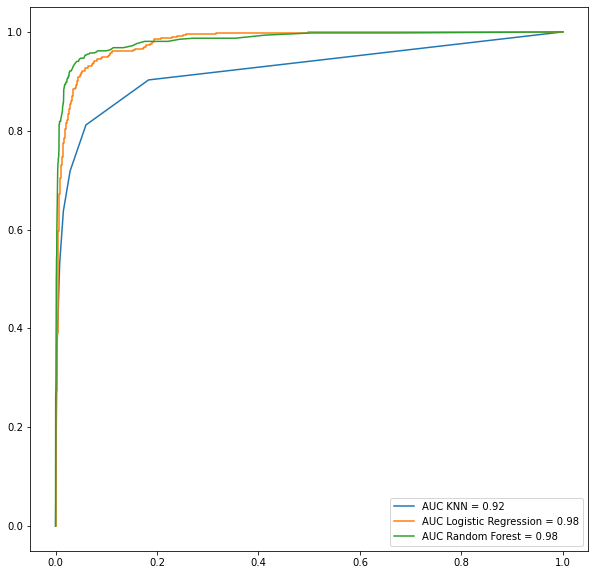

In [23]:
logreg, rf_classifier, knn

roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(fpr_knn,tpr_knn,label='AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_lr,tpr_lr, label='AUC Logistic Regression = %0.2f' % roc_auc_lr)
plt.plot(fpr_rf,tpr_rf,label='AUC Random Forest = %0.2f' % roc_auc_rf)

plt.legend(loc="lower right")
plt.show()